# Predicting Listing Gains in the Indian IPO Market Using TensorFlow
## The Task
An investment firm that is interested in investing in the **Initial Public Offerings (IPO)** in the Indian market. You have been hired as a data scientist to build a deep learning **classification model to determine if there will be listing gains for the IPO**.

    Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing
    
### The Dataset
The dataset provided for this project (`Indian_IPO_Market_Data.csv`) contains information on past IPOs in the Indian market can be downloaded from [moneycontrol](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true).

### Load and Explore the dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/Indian_IPO_Market_Data.csv')
print(df.shape)
df.head()

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


**The data consists of following columns:**

* `Date`: date when the IPO was listed

* `IPOName`: name of the IPO

* `Issue_Size`: size of the IPO issue, in INR Crores

* `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

* `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

* `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

* `Subscription_Total`: total number of times the IPO was subscribed overall

* `Issue_Price`: the price in INR at which the IPO was issued

* `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


**The dataset contains `319` observation with no missing values, as confirmed below**.

In [4]:
z = df.isnull().sum()
print(f'Columns with missing values:\n{z[z > 0]}')

Columns with missing values:
Series([], dtype: int64)


In [5]:
import warnings
warnings.filterwarnings('ignore')

df.describe(include = 'all').fillna('-')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.0,319.0,319.0,319.0,319.0,319.0,319.0
unique,287,319,-,-,-,-,-,-,-
top,16/08/21,Infinite Comp,-,-,-,-,-,-,-
freq,4,1,-,-,-,-,-,-,-
mean,-,-,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,-,-,2384.643786,40.716782,142.454416,14.50867,48.772203,353.897614,47.650946
min,-,-,0.0,0.0,0.0,0.0,0.0,0.0,-97.15
25%,-,-,169.005,1.15,1.255,1.275,1.645,119.0,-11.555
50%,-,-,496.25,4.94,5.07,3.42,4.93,250.0,1.81
75%,-,-,1100.0,34.635,62.095,8.605,33.395,536.0,25.31


In [6]:
df['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

#### The target variable
Our task is to train a deep learning **classification model**. However, the target variable, **Listing_Gains_Percent** is **continous**. Therfore, we will need to convert it into a **categorical** variable before we can proceed.

In [7]:
df['Listing_Gains_Profit'] = (df['Listing_Gains_Percent'] > 0).astype(int)
df['Listing_Gains_Profit'].value_counts()

Listing_Gains_Profit
1    174
0    145
Name: count, dtype: int64

In [8]:
df['Listing_Gains_Profit'].value_counts(normalize = True)

Listing_Gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

**`55%`** of IPO are listed as **profit** while **`45%`** is listed as **loss**.

**The categorical target variable (`Listing_Gains_Profit`) is relative balanced. We shall not have to worry about issues regarding imbalanced target.**

The variable `IPOName` has 319 unique values. This means every observation is unique. The variable `IPOName` therefore won't contribute much is creating any pattern from which the model can learn. 

Similarly, the variable `Date` has `287` unique values and therefore won't help the model to learn any pattern. We will drop both `IPOName` and `Date` columns from the dataset.

The `Listing_Gains_Percent` variable is now redundant and can be dropped from the dataset as well.

In [9]:
df.drop(['Listing_Gains_Percent', 'Date ', 'IPOName'], axis = 1, inplace = True)
df.head()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
0,189.80,48.44,106.02,11.08,43.22,165,1
1,328.70,59.39,51.95,3.79,31.11,145,0
2,56.25,0.99,16.60,6.25,5.17,75,1
3,199.80,1.12,3.65,0.62,1.22,165,0
4,0.00,0.52,1.52,2.26,1.12,75,0


### Data Visualization
#### Target Variable

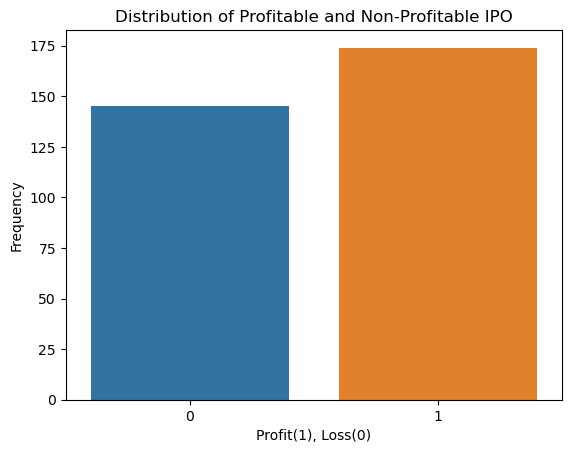

In [10]:
sns.countplot(x = 'Listing_Gains_Profit', data = df)
plt.title('Distribution of Profitable and Non-Profitable IPO')
plt.xlabel('Profit(1), Loss(0)')
plt.ylabel('Frequency');

### Using Box Plots to check for Outliers

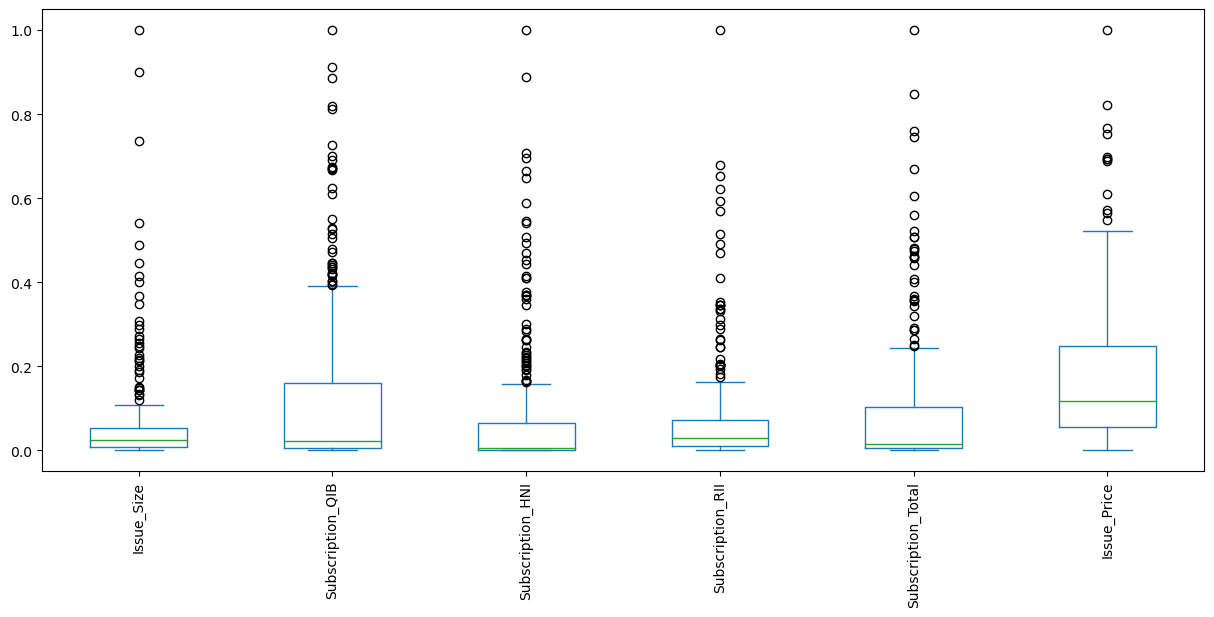

In [11]:
predictors = df.loc[:, list(df)[:-1]]
predictors = predictors / predictors.max()
predictors.plot(kind = 'box', figsize = (15, 6))
plt.xticks(rotation = 90);

**It can be seen that all the predictors have outliers on the high side!.**
### Checking for collinearity between features

In [12]:
correlation = predictors.corr().abs()
correlation

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price
Issue_Size,1.000000,0.037724,0.103484,0.147791,0.093351,0.364733
Subscription_QIB,0.037724,1.000000,0.773933,0.437462,0.815785,0.188105
Subscription_HNI,0.103484,0.773933,1.000000,0.622993,0.954816,0.037283
Subscription_RII,0.147791,0.437462,0.622993,1.000000,0.718738,0.072112
Subscription_Total,0.093351,0.815785,0.954816,0.718738,1.000000,0.051174
Issue_Price,0.364733,0.188105,0.037283,0.072112,0.051174,1.000000


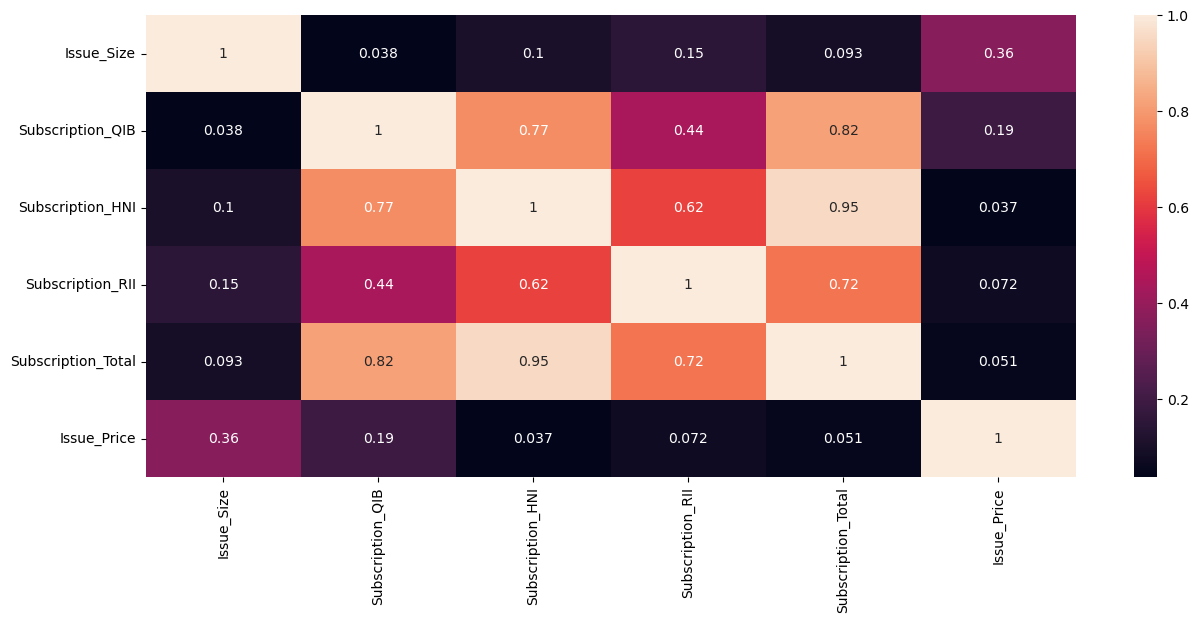

In [13]:
plt.figure(figsize = (15, 6))
sns.heatmap(correlation, annot = True)
plt.xticks(rotation = 90);

The pearson's correlation between `Subscription_HNI` and `Subscription_Total` is `0.954816` which very high. These two columns would contribute similar information for the model to learn from. **One of them is therefore redundant and can be dropped as predictor**. 

**But since the correlation is not 1, we should probably still use it in the model, at least in the baseline model.**

In [14]:
df.drop('Subscription_HNI', axis = 1, inplace = True)

### Outlier Treatment
#### Outlier Removal - Using IQR Value
All data points that are within **`1.5 times of an interquartile range (IQR)`** from the **upper** and **lower quartiles** are "normal" and anything outside of that range should be considered an **outlier**.

    q1 = df['column'].quantile(q = 0.25)
    q3 = df['column'].quantile(q = 0.75)  
    iqr = q3 - q1   
    lower = (q1 - 1.5 * iqr) 
    upper = (q3 + 1.5 * iqr)
    
Once you have identified the **lower** and **upper bound**, it's easy to replace outliers with the **`clip()`** method:

    df['column'].clip(lower, upper)
    
**The `.clip()` method assigns values outside boundary to boundary values.**
#### Helper function to handle outliers

In [15]:
def clip_outliers(col_name):
    q1 = df[col_name].quantile(q = 0.25)
    q3 = df[col_name].quantile(q = 0.75)  
    iqr = q3 - q1   
    lower = (q1 - 1.5 * iqr) 
    upper = (q3 + 1.5 * iqr)
    return df[col_name].clip(lower, upper)

In [16]:
cols = list(df)[:-1]
for col in cols:
    df[col] = clip_outliers(col)

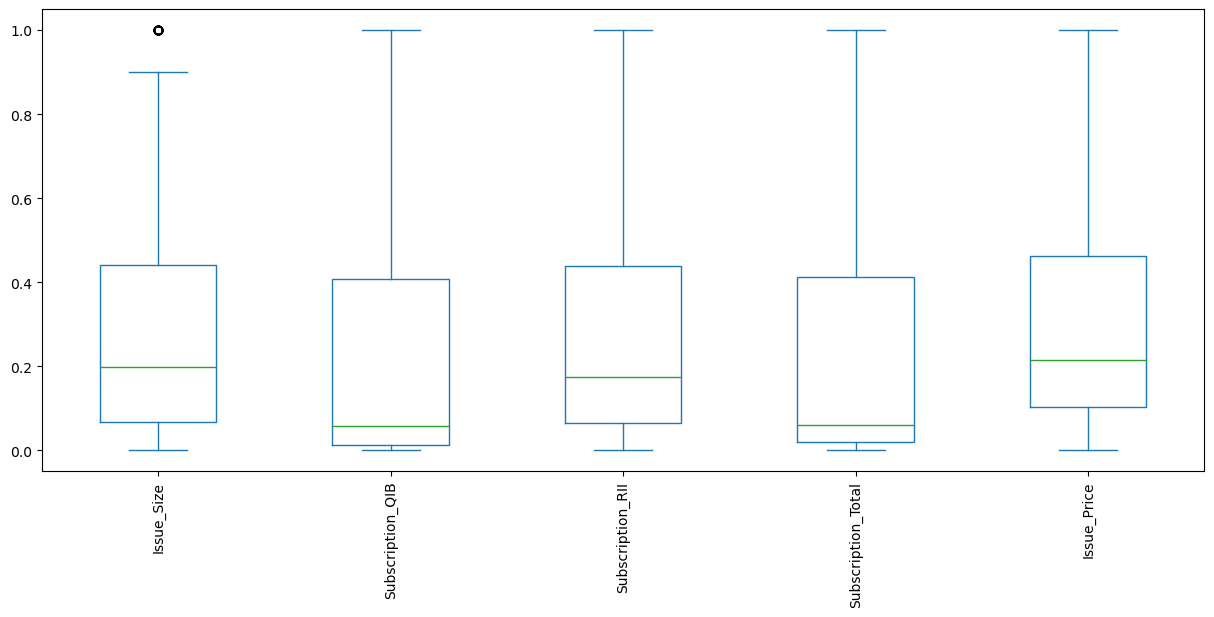

In [17]:
predictors = df.loc[:, list(df)[:-1]]
predictors = predictors / predictors.max()
predictors.plot(kind = 'box', figsize = (15, 6))
plt.xticks(rotation = 90);

**The outliers have been handled successfully.**
### Setting the Target and Predictor Variables

In [18]:
y = df.loc[:, 'Listing_Gains_Profit']
X = df.drop('Listing_Gains_Profit', axis = 1)
X = X / X.max()
X.describe()

,Issue_Size,Subscription_QIB,Subscription_RII,Subscription_Total,Issue_Price
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.309232,0.252489,0.311793
std,0.308308,0.342961,0.315147,0.335939,0.268853
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.065051,0.020304,0.102454
50%,0.198779,0.058212,0.174490,0.060849,0.215239
75%,0.440618,0.408131,0.439031,0.412182,0.461472
max,1.000000,1.000000,1.000000,1.000000,1.000000


The predictors have been normalized as can be seen above.
### Train - Test Split

**NOTE:** When running Tensorflow locally on my laptop, I got a `ValueError` that my inputs were of `float64` or so. You might have to convert your input to `float32` before feeding into the network.

In [19]:
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

print(X_train.shape)
print(X_test.shape)

(223, 5)
(96, 5)


### Define and train the Deep Learning Classification Model
#### Defining the Model with the Functional API

In [20]:
tf.random.set_seed(100)

input_shape = (X_train.shape[1], )

input_layer = keras.Input(shape = input_shape)
hidden_layer1 = layers.Dense(units = 32, activation = 'relu')(input_layer)
hidden_layer2 = layers.Dense(units = 16, activation = 'relu')(hidden_layer1)
hidden_layer3 = layers.Dense(units = 8, activation = 'relu')(hidden_layer2)
hidden_layer4 = layers.Dense(units = 4, activation = 'relu')(hidden_layer3)
output_layer = layers.Dense(1, activation = 'sigmoid')(hidden_layer4)
model = keras.Model(inputs = input_layer, outputs = output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params:

### Compile, Fit, and Evaluate the Model
We will use: 
* **Adam** optimizer  
* **BinaryCrossentropy** as loss function. **BinaryCrossentropy** is used to compute the loss for a **binary classification** problem.
* The **accuracy** evaluation metric is used to evaluate the performance of a **binary classification** model.

In [21]:
tf.random.set_seed(100)

optimizer = keras.optimizers.Adam(learning_rate = 0.001)
loss = keras.losses.BinaryCrossentropy()
metrics = ['accuracy']
epochs = 150

model.compile(loss = loss, metrics = metrics, optimizer = optimizer)
model.fit(X_train, y_train, epochs = epochs, verbose = 0)

#### Evaluate the Model
We will evaluate the performance of the model using `evaluate()` method.

In [22]:
tf.random.set_seed(100)

loss_train, acc_train = model.evaluate(X_train, y_train)
loss_test, acc_test = model.evaluate(X_test, y_test)

print(f'Train loss = {loss_train}')
print(f'Train accuracy = {acc_train}')
print()
print(f'Test loss = {loss_test}')
print(f'Test accuracy = {acc_test}')

3/3 [==============================] - 0s 6ms/step - loss: 0.6252 - accuracy: 0.7292
Train loss = 0.5658114552497864
Train accuracy = 0.7085201740264893

Test loss = 0.6252257823944092
Test accuracy = 0.7291666865348816


Both loss and accuracy metrics indicate that the model is probably overfitting. The **train accuracy is `72%`** while the **test accuracy is `73%`**! Let's include **regularization**...

#### Add dropout layers
A **dropout layer** is a **regularization** technique for neural networks that helps prevent **overfitting**. The idea behind a dropout layer is to randomly **drop or switch off** some neurons. This would prevent neurons higher up from "seeing" what neurons below have learnt. These neurons would therefore be forced to learn their own mappings without much inputs from previous layers.

In [23]:
tf.random.set_seed(100)

input_shape = (X_train.shape[1], )

input_layer = keras.Input(shape = input_shape)
hidden_layer1 = layers.Dense(units = 32, activation = 'relu')(input_layer)
drop1 = layers.Dropout(rate = 0.20)(hidden_layer1)
hidden_layer2 = layers.Dense(units = 16, activation = 'relu')(drop1)
drop2 = layers.Dropout(rate = 0.20)(hidden_layer2)
hidden_layer3 = layers.Dense(units = 8, activation = 'relu')(drop2)
hidden_layer4 = layers.Dense(units = 4, activation = 'relu')(hidden_layer3)
output_layer = layers.Dense(1, activation = 'sigmoid')(hidden_layer4)
model = keras.Model(inputs = input_layer, outputs = output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36  

In [24]:
tf.random.set_seed(100)

optimizer = keras.optimizers.Adam(learning_rate = 0.001)
loss = keras.losses.BinaryCrossentropy()
metrics = ['accuracy']
epochs = 150

model.compile(loss = loss, metrics = metrics, optimizer = optimizer)
model.fit(X_train, y_train, epochs = epochs, verbose = 0)

In [25]:
tf.random.set_seed(100)

loss_train, acc_train = model.evaluate(X_train, y_train)
loss_test, acc_test = model.evaluate(X_test, y_test)

print(f'Train loss = {loss_train}')
print(f'Train accuracy = {acc_train}')
print()
print(f'Test loss = {loss_test}')
print(f'Test accuracy = {acc_test}')

3/3 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.7500
Train loss = 0.621694028377533
Train accuracy = 0.6905829310417175

Test loss = 0.6166754961013794
Test accuracy = 0.75


**Both training and test metrics are relatively close to each other. It seems the model without regularization performs better!**

**However, a test accuracy of just `75%` is not good enough. We can continue to experiment with different ` number of hidden layers, number of neurons and dropout layers`  until we obtain a better outcome.**